In [175]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

sns.set(style="white")

In [176]:
# reading the merged file. 

df =pd.read_csv("/Users/jj/PycharmProjects/little_ds_problem/src/merged.vcf", sep="\t", index_col=0)

In [177]:
# dropping duplicated rows after merging.
df = df.drop_duplicates()

# Looking at the heat map, T_QQ, ti_NS and ti_HS is None and FILTER is always PASS. 
# tf_GT == 

df = df.drop(["ti_NS", 'ti_HS', 'T_QQ', 'FILTER', 'tf_GT', 'T_GT', 'Q_GT'], axis=1)




# Drop all rows with multiple alternate allele observations.

def get_mult_alt(row):
    if len(row.ALT.split(",")) > 1:
        return 1
    else:
        return 0
    

df["mult_alt_allele"] = df.apply(get_mult_alt, axis=1)




# Q_BD is our Target.  Looking at this, there is only two option.  FP or TP. 
# I will make another column called target FP = 0 or FALSE, TP = 1 or TRUE.

def get_target(row):
    if row.Q_BD == 'FP':
        return 0
    elif row.Q_BD == 'TP':
        return 1 
   

df["target"] = df.apply(get_target, axis=1)

df = df[df.mult_alt_allele != 1]

In [178]:
# Convert categorical values into continuous variables. 
# This is very painful part when you have 76 columns 

df

,CHROM,POS,REF,ALT,QUAL,tf_GQ,tf_DP,tf_RO,tf_AO,tf_SRF,...,T_BLT,T_BVT,Q_BD,Q_BI,Q_BK,Q_BLT,Q_BVT,Q_QQ,mult_alt_allele,target
0,1,871334,G,T,496.5430,332.0,192.0,87.0,105.0,48.0,...,nocall,NOCALL,FP,tv,NaN,het,SNP,496.5430,0,0
1,1,876499,A,G,2585.0000,122.0,271.0,0.0,222.0,0.0,...,nocall,NOCALL,FP,ti,NaN,homalt,SNP,2585.0000,0,0
2,1,877715,C,G,366.7000,8.0,44.0,2.0,42.0,2.0,...,homalt,SNP,TP,tv,gm,homalt,SNP,366.7000,0,1
4,1,878314,G,C,306.1140,15.0,33.0,0.0,33.0,0.0,...,homalt,SNP,TP,tv,gm,homalt,SNP,306.1140,0,1
5,1,880238,A,G,904.5430,43.0,95.0,0.0,95.0,0.0,...,homalt,SNP,TP,ti,gm,homalt,SNP,904.5430,0,1
6,1,881627,G,A,2620.1800,115.0,282.0,1.0,276.0,1.0,...,homalt,SNP,TP,ti,gm,homalt,SNP,2620.1800,0,1
7,1,883625,A,G,577.4400,27.0,57.0,0.0,57.0,0.0,...,nocall,NOCALL,FP,ti,NaN,homalt,SNP,577.4400,0,0
8,1,887560,A,C,2091.2500,90.0,218.0,1.0,217.0,1.0,...,homalt,SNP,TP,tv,gm,homalt,SNP,2091.2500,0,1
9,1,887801,A,G,867.0580,41.0,89.0,0.0,89.0,0.0,...,homalt,SNP,TP,ti,gm,homalt,SNP,867.0580,0,1
11,1,888639,T,C,877.1220,34.0,90.0,1.0,89.0,0.0,...,homalt,SNP,TP,ti,gm,homalt,SNP,877.1220,0,1


In [179]:
# Look at the correlation matrix and figure out which fields are not important. 
# keep tf_GQ
# drop 'tf_DP', 'tf_RO', 'tf_SRF', 'tf_SRR'

# df = df.drop(['tf_DP', 'ti_DP', 'tf_RO', 'tf_SRF', 'tf_SRR'], axis=1)


corr_matrix = df.corr()

high_corr_var=np.where(corr_matrix>0.8)
high_corr_var=[(corr_matrix.index[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y] 

high_corr_var







# df[["tf_GQ",'tf_FSRF']]

[('QUAL', 'Q_QQ'),
 ('tf_GQ', 'tf_FRO'),
 ('tf_GQ', 'tf_FSRF'),
 ('tf_GQ', 'tf_FSRR'),
 ('tf_GQ', 'ti_FRO'),
 ('tf_GQ', 'ti_FSRF'),
 ('tf_GQ', 'ti_FSRR'),
 ('tf_DP', 'tf_FDP'),
 ('tf_DP', 'ti_DP'),
 ('tf_DP', 'ti_FDP'),
 ('tf_RO', 'tf_SRF'),
 ('tf_RO', 'tf_SRR'),
 ('tf_RO', 'tf_FRO'),
 ('tf_RO', 'tf_FSRF'),
 ('tf_RO', 'tf_FSRR'),
 ('tf_RO', 'ti_RO'),
 ('tf_RO', 'ti_SRF'),
 ('tf_RO', 'ti_SRR'),
 ('tf_RO', 'ti_FRO'),
 ('tf_RO', 'ti_FSRF'),
 ('tf_RO', 'ti_FSRR'),
 ('tf_SRF', 'tf_SRR'),
 ('tf_SRF', 'tf_FRO'),
 ('tf_SRF', 'tf_FSRF'),
 ('tf_SRF', 'ti_RO'),
 ('tf_SRF', 'ti_SRF'),
 ('tf_SRF', 'ti_SRR'),
 ('tf_SRF', 'ti_FRO'),
 ('tf_SRF', 'ti_FSRF'),
 ('tf_SRR', 'tf_FRO'),
 ('tf_SRR', 'tf_FSRR'),
 ('tf_SRR', 'ti_RO'),
 ('tf_SRR', 'ti_SRF'),
 ('tf_SRR', 'ti_SRR'),
 ('tf_SRR', 'ti_FRO'),
 ('tf_SRR', 'ti_FSRR'),
 ('tf_FDP', 'ti_DP'),
 ('tf_FDP', 'ti_FDP'),
 ('tf_FRO', 'tf_FSRF'),
 ('tf_FRO', 'tf_FSRR'),
 ('tf_FRO', 'ti_RO'),
 ('tf_FRO', 'ti_SRF'),
 ('tf_FRO', 'ti_SRR'),
 ('tf_FRO', 'ti_FRO'),
 ('t

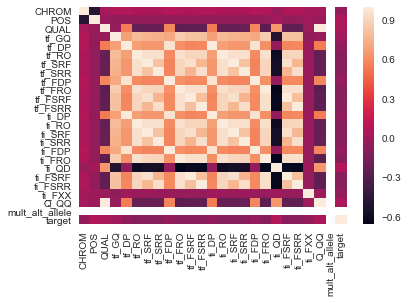

In [180]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [182]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

s = obj_df.tf_SAF
# 
# 
pd.to_numeric(s, downcast='float')


# [['REF', 'ALT', 'tf_SAF', 'tf_FSAF']]

0         64.0
1        139.0
2         18.0
4         18.0
5         29.0
6        154.0
7         23.0
8         97.0
9         37.0
11        46.0
12        44.0
13        77.0
14       235.0
16        19.0
17       121.0
18        68.0
20        77.0
21        21.0
23       100.0
24        63.0
25        40.0
26         3.0
27         3.0
28       161.0
29        79.0
30        86.0
31         0.0
32        17.0
33        53.0
34        67.0
         ...  
54788     86.0
54790     70.0
54791     38.0
54792     48.0
54794     37.0
54795     29.0
54796     81.0
54797     27.0
54798     38.0
54799     25.0
54800     23.0
54802     23.0
54804     48.0
54805     83.0
54806     68.0
54807      4.0
54808     42.0
54809     16.0
54810      8.0
54811     23.0
54813     53.0
54814     11.0
54815      1.0
54816      5.0
54817     11.0
54818      6.0
54819     25.0
54820      8.0
54821     44.0
54822     34.0
Name: tf_SAF, Length: 50695, dtype: float32

In [146]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

test_df = df
X = test_df.drop(['target'], axis=1)
y = test_df.target

X.shape

clf = ExtraTreesClassifier()
clf = clf.fit(X, y)
clf.feature_importances_  
# 
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape

ValueError: could not convert string to float: 'SNP'